## Theory behind Reparameterization Trick - somemore additions to the original version by Goker Erdogan

Here we will understand the reparameterization trick used by Kingma and Welling (2014) to train their variational autoencoder.  

Assume we have a normal distribution $q$ that is parameterized by $\theta$, specifically $q_{\theta}(x) = N(\theta,1)$. We want to solve the below problem
$$
\text{min}_{\theta} \quad E_q[x^2]
$$
This is of course a rather silly problem and the optimal $\theta$ is obvious. We want to understand how the reparameterization trick helps in calculating the gradient of this objective $E_q[x^2]$.

What is the expected value of $E_q[x^2]$ ?
<br> It is nothing but variance + (mean)^2. Therefore, in this case, it is $\theta^2$ + 1 

One way to calculate $\nabla_{\theta} E_q[x^2]$ is as follows
$$
\nabla_{\theta} E_q[x^2] = \nabla_{\theta} \int q_{\theta}(x) x^2 dx = \int x^2 \nabla_{\theta} q_{\theta}(x) \frac{q_{\theta}(x)}{q_{\theta}(x)} dx = \int q_{\theta}(x) \nabla_{\theta} \log q_{\theta}(x) x^2 dx = E_q[x^2 \nabla_{\theta} \log q_{\theta}(x)]
$$

For our example where $q_{\theta}(x) = N(\theta,1)$, this method gives
$$
\nabla_{\theta} E_q[x^2] = E_q[x^2 (x-\theta)]
$$

 What is the variance of $E_q[x^2 (x-\theta)]$ in this case? <br>
It can be found using some complicated, yet straightforward math. $Var(\mu^2 \epsilon + 2\mu \epsilon^2 + \epsilon^3) \le \mu^4Var(\epsilon) \le \mu^4$ <br>
Therefore, variance of the sample mean of $E_q[x^2 (x-\theta)]$ will be at least $\frac{\mu^4}{\sqrt{n}}.  $ We can indeed verify that this variance increases with $\mu$. Note that the pathwise gradient does not have this problem.


Reparameterization trick is a way to rewrite the expectation so that the distribution with respect to which we take the expectation is independent of parameter $\theta$. To achieve this, we need to make the stochastic element in $q$ independent of $\theta$. Hence, we write $x$ as
$$
x = \theta + \epsilon, \quad \epsilon \sim N(0,1)
$$
Then, we can write 
$$
E_q[x^2] = E_p[(\theta+\epsilon)^2]
$$ 
where $p$ is the distribution of $\epsilon$, i.e., $N(0,1)$. Now we can write the derivative of $E_q[x^2]$ as follows
$$
\nabla_{\theta} E_q[x^2] = \nabla_{\theta} E_p[(\theta+\epsilon)^2] = E_p[2(\theta+\epsilon)]
$$

In the above case, it is easy to note that the sample mean will have a variance of $\frac{4}{\sqrt{n}}$,which looks independent of $\mu$.

Now let us compare the variances of the two methods; we are hoping to see that the first method has high variance while reparameterization trick decreases the variance substantially.

### With mean = 2

In [9]:
import numpy as np
N = 1000
theta = 2.0
eps = np.random.randn(N)
x = theta + eps

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size

print(grad1(x))
print(grad2(eps))

4.46987762159
4.0049370725


Let us plot the variance for different sample sizes.

In [11]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    
print(means1)
print(means2)
print()
print(vars1)
print(vars2)

[ 3.83308758  4.17732132  4.03749362  4.0038104   3.99963078]
[ 3.94268392  3.98675915  3.99294035  4.00027849  3.99867565]

[  7.45917124e+00   9.30015407e-01   1.07891619e-01   7.75693999e-03
   7.18216538e-04]
[  4.20838313e-01   4.95357825e-02   3.08525422e-03   5.23447771e-04
   4.67591593e-05]


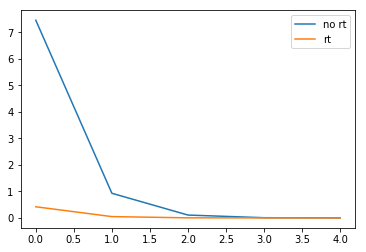

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(vars1)
plt.plot(vars2)
plt.legend(['no rt', 'rt'])

### With Mean = 4

In [13]:
import numpy as np
N = 1000
theta = 4.0
eps = np.random.randn(N)
x = theta + eps

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size

print(grad1(x))
print(grad2(eps))

8.21042768013
8.00297159378


In [14]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    
print(means1)
print(means2)
print()
print(vars1)
print(vars2)

[ 7.10268014  7.76506099  7.97939537  7.98034447  7.99926034]
[ 7.96493658  8.029654    8.00478523  7.99798582  8.00045835]

[  4.29122272e+01   4.72726275e+00   5.18028029e-01   4.56198198e-02
   6.21425882e-03]
[  3.89176129e-01   4.69674631e-02   3.43539689e-03   4.22794837e-04
   3.06639728e-05]


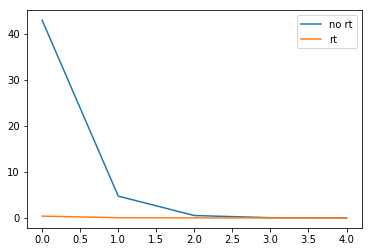

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(vars1)
plt.plot(vars2)
plt.legend(['no rt', 'rt'])

Variance of the estimates using reparameterization trick is one order of magnitude smaller than the estimates from the first method!

Here are some additional resources I found interesting:

<ol>
  <li>Section 3.1 from [Yarin Gal's Thesis](http://mlg.eng.cam.ac.uk/yarin/thesis/thesis.pdf) contains a different and more rigorous derivation</li>
  <li>[Miller's blog](http://andymiller.github.io/2016/12/19/elbo-gradient-estimators.html) reconciles various estimators like score fucntion estimators, pathwise estimators, etc. It was here I came across the relation between Control variates in linear regression and variance reduction in pathwise estimators. Mind = Blown </li>
  
  <li>This is question two.</li>
</ol>

In [8]:
import sys
print(sys.version)
import platform
print(platform.python_version())
print("The Python version is %s.%s.%s" % sys.version_info[:3])

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
3.6.1
The Python version is 3.6.1
